In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataPath = "/content/drive/MyDrive/DataScience/Emergency Calls.csv"
df = pd.read_csv(dataPath)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


1. How will you check the details of the dataframe? Get the shape of the dataset.

In [ ]:
df.shape

(99492, 9)

In [ ]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


In [ ]:
df.dtypes

lat          float64
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
dtype: object

In [ ]:
df.isna().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

2. Create new feature
Check the titles column which is of the form "Reasons/Departments" specified before the
title code. These are EMS, Fire, and Traffic.
For example, if the title column value is Fire: GAS-ODOR/LEAK, the Reason column value
would be Fire.

In [ ]:
reason_split = lambda title: title.split(":")[0]

In [ ]:
df['reason'] = df["title"].apply(reason_split)

In [ ]:
df['reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: reason, Length: 99492, dtype: object

3. What are the top 5 zipcodes for Emergency calls?

In [ ]:
df['zip'].dropna().value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

4. What are the top 5 townships (twp) for Emergency calls?

In [ ]:
df['twp'].dropna().value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

5. Create a count plot of Emergency calls by Reason.

In [ ]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

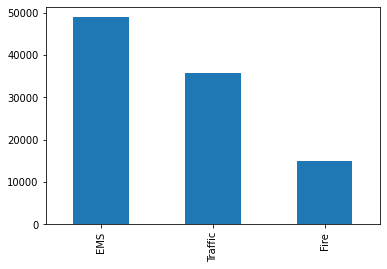

In [ ]:
df['reason'].value_counts().plot.bar()
plt.show()

6. How many unique title codes are there?

In [ ]:
len(df['title'].unique())

110

7. What is the most common Reason for a Emergency call based off of this new column?

In [ ]:
df['reason'].value_counts().head(1)

EMS    48877
Name: reason, dtype: int64

8. Now use seaborn to create a countplot of Emergency calls by Reason.

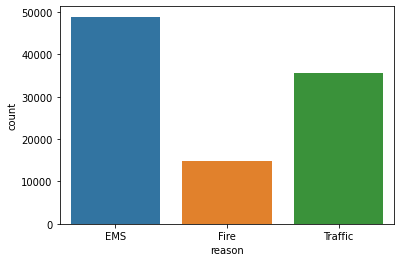

In [ ]:
sns.countplot(x="reason",data=df)
plt.show()

9. What is the data type of the objects in the timeStamp column?

In [ ]:
df['timeStamp'].dtypes

dtype('O')

10. You should have seen that these timestamps are still strings.

Use [pd.to_datetime](http://pandas.pydata.org/pandas-
docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to

DateTime objects.

In [ ]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

11. The timestamp columns are actually DateTime objects. Create three new columns called Hour, Month, and Day of Week

In [ ]:
get_hour = lambda time: time.hour
get_minute = lambda time: time.minute
get_second = lambda time: time.second

In [ ]:
df['hour'] = df['timeStamp'].apply(get_hour)
df['minute'] = df['timeStamp'].apply(get_minute)
df['second'] = df['timeStamp'].apply(get_second)

In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,minute,second
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,40,0
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,40,0
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,40,0
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,40,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,40,1


12. Map the actual string names to the day of the week

In [ ]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
get_day = lambda date: days[date.weekday()]
df['weekday'] = df['timeStamp'].apply(get_day)

In [ ]:
df['weekday']

0         Thursday
1         Thursday
2         Thursday
3         Thursday
4         Thursday
           ...    
99487    Wednesday
99488    Wednesday
99489    Wednesday
99490    Wednesday
99491    Wednesday
Name: weekday, Length: 99492, dtype: object

13. Create a countplot of the Day of Week column with the hue based off of the Reason column

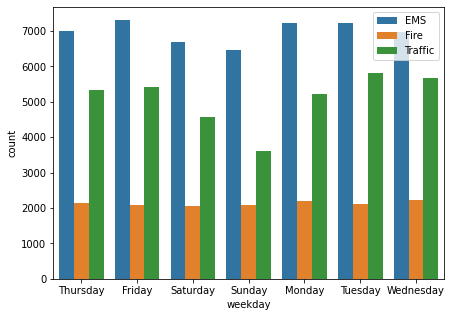

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x="weekday",data=df, hue="reason")
plt.legend(loc="best")
plt.show()

14. Repeat the task-13 for Months.

In [ ]:
months = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November','December']
get_month = lambda date: months[date.month-1]
df['month'] = df['timeStamp'].apply(get_month)

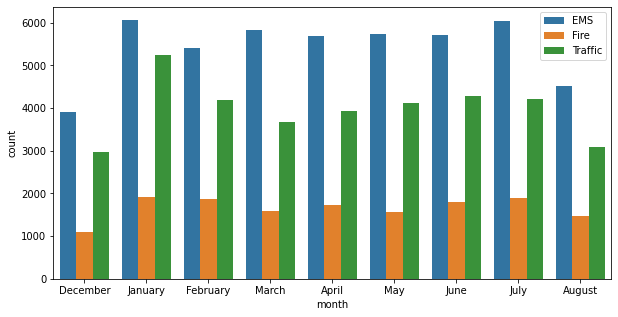

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="month",data=df, hue="reason")
plt.legend(loc="best")
plt.show()

15. Did you notice something strange about the Plot obtained in task-14?

In [ ]:
df['month'].value_counts()

January     13205
July        12137
June        11786
February    11467
May         11423
April       11326
March       11101
August       9078
December     7969
Name: month, dtype: int64

There are few months with no emergency calls.

16. Create a simple plot off of the dataframe indicating the count of calls per month.

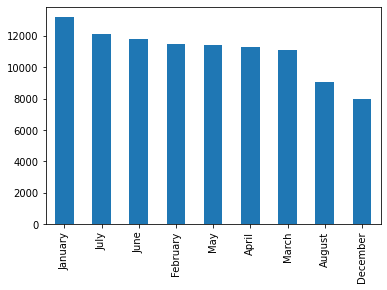

In [ ]:
df['month'].value_counts().plot.bar()
plt.show()

17. Create a new column called 'Date' that contains the date from the timeStamp column.

In [ ]:
print(df['timeStamp'][0].date())

2015-12-10


In [ ]:
get_date = lambda date: date.date()
df['date'] = df['timeStamp'].apply(get_date)

In [ ]:
df['date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: date, Length: 99492, dtype: object

18. Create a plot of counts of Emergency calls date wise.

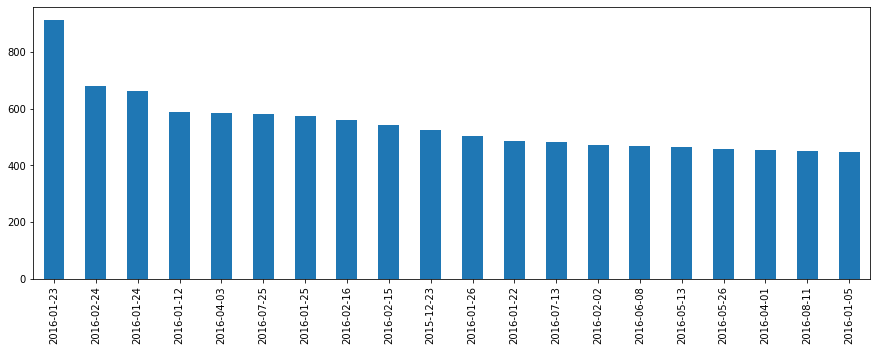

In [ ]:
# Displaying call results for first 20 days
plt.figure(figsize=(15,5))
df['date'].value_counts().head(20).plot.bar()
plt.show()

19. Create three separate plots with each plot representing a Reason for the Emergency calls.

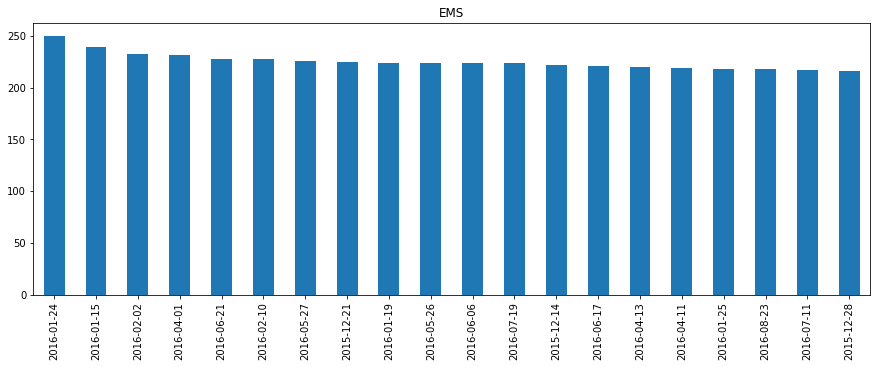

In [ ]:
# EMS
plt.figure(figsize=(15,5))
df[df['reason']=="EMS"]['date'].value_counts().head(20).plot.bar()
plt.title("EMS")
plt.show()

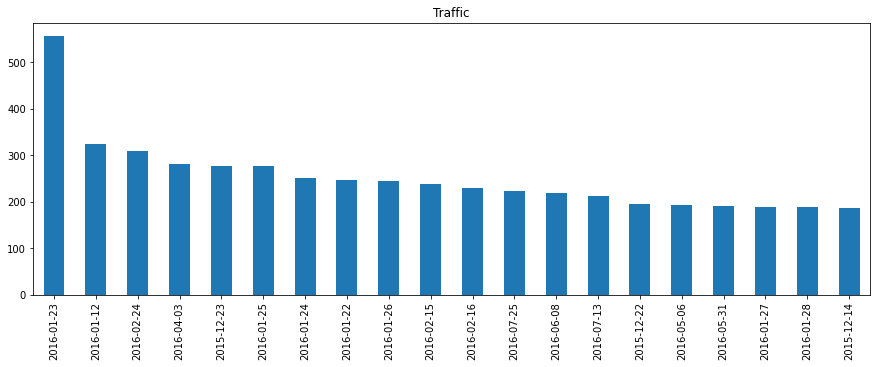

In [ ]:
# Traffic
plt.figure(figsize=(15,5))
df[df['reason']=="Traffic"]['date'].value_counts().head(20).plot.bar()
plt.title("Traffic")
plt.show()

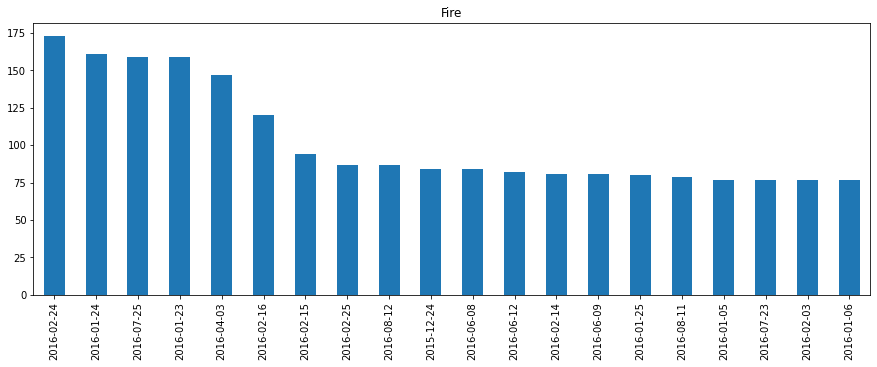

In [ ]:
# Fire
plt.figure(figsize=(15,5))
df[df['reason']=="Fire"]['date'].value_counts().head(20).plot.bar()
plt.title("Fire")
plt.show()

20. Create heatmaps: Restructure the dataframe so that the columns become the Hours and
the Index becomes the Day of the Week.

In [ ]:
dayHour = df.groupby(['weekday','hour']).count().unstack()['reason']
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Monday,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Saturday,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sunday,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thursday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


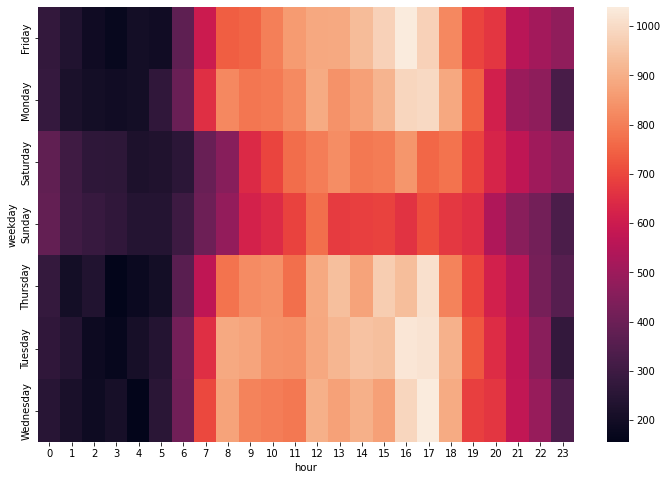

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(dayHour)
plt.show()

21. Create a clustermap using this DataFrame.

<Figure size 864x576 with 0 Axes>

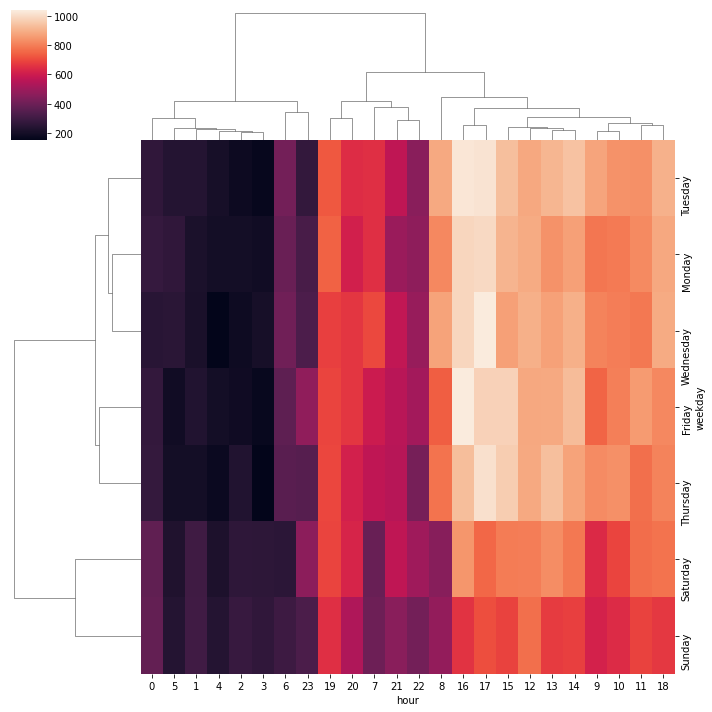

In [ ]:
plt.figure(figsize=(12,8))
sns.clustermap(dayHour)
plt.show()

22. Repeat task-20 for a DataFrame that shows the Month as the column.

In [ ]:
monthhour = df.groupby(['month','hour']).count().unstack()['reason']
monthhour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month,,,,,,,,,,,,,,,,,,,,,
April,243,204,170,161,179,178,316,482,613,598,...,705,728,767,728,646,533,472,377,309,282
August,219,182,166,135,131,144,188,326,466,465,...,552,612,656,564,476,419,373,345,245,247
December,150,131,126,118,105,135,184,268,342,373,...,488,455,508,622,573,419,361,305,286,204
February,267,194,161,149,161,213,325,550,597,603,...,648,704,692,674,693,578,518,453,426,327
January,294,218,225,205,205,214,386,551,755,752,...,775,691,725,871,798,687,592,507,421,345


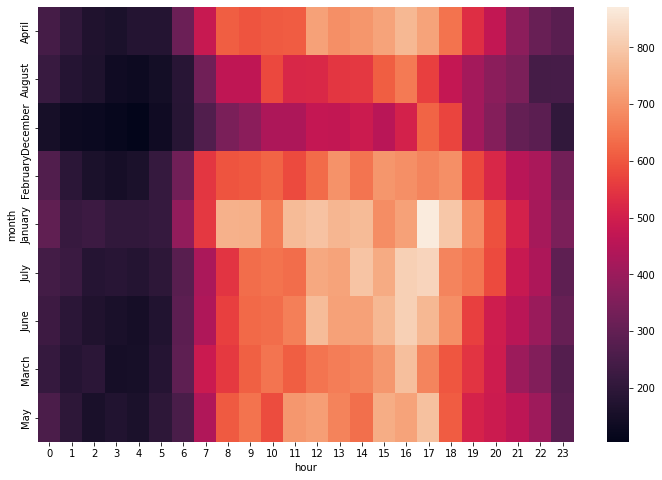

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(monthhour)
plt.show()

23. Repeat task-21 for a DataFrame that shows the Month as the column.

<Figure size 864x576 with 0 Axes>

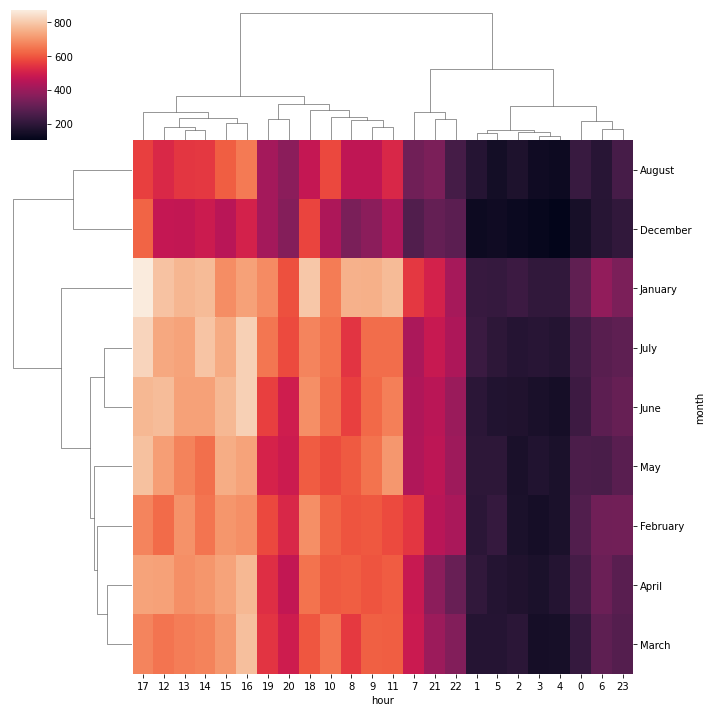

In [ ]:
plt.figure(figsize=(12,8))
sns.clustermap(monthhour)
plt.show()